## Labeled dataset generation
#### Developed during AE4317 Autonomous Flight of Micro Air Vehicles
Author: Tim den Blanken (t.n.a.denblanken@student.tudelft.nl)

This notebook assumes you already have a dataset of images captured by the drone, both in real life and in simulation. In general the bigger your dataset the better, however you should always keep in mind that having bad data will lead to a bad model. So, make sure that the images in your dataset are representative of the environment in which your drone will fly. Later (while training) we can make the model more robust for these circumstances through data augmentation. This notebook already augments the simulator images, such that they better represent real life.

The approach taken in these notebooks is using depth maps of the image to classify each image as either 'left', 'forward' or 'right'. These classifications correspond to the movement that the drone should take in the specific situation. The labels are calculated as follows: first the image is split into three regions, then for each region the average depth is calculated, and finally the image is assigned the label corresponding to the image region with the most depth. You can follow this same approach or experiment with a different number of regions. 

For all code to work as expected it is recommended to follow the file structure for the images as it is set up in this repository. It comes down to the following:
- all images captured in real life should be in the folder `images/real`
- all depth maps corresponding to the real life images should be in the folder `images/real_depth`
- all images captured in the simulator should be in the folder `images/sim`
- all depth maps corresponding to the simulator images should be in the folder `images/sim_depth`

First make sure to have copied all you data into the folder `images/real` and `images/sim`. Next, it is time to get the depth maps of each image, this you will have to do yourself, but luckily it is rather easy using [Depth-Anything](https://github.com/LiheYoung/Depth-Anything "Depth Anything: Unleashing the Power of Large-Scale Unlabeled Data"). To do this, clone the repository and install the requirements.txt, then simply run it. You can specify the encoder (the larger the better, but also computationally more expensive), and make sure to set the correct directories and use `--pred-only`. Your command should look like the following:
```bash
python run.py --encoder vitl --img-path path/to/images/real --outdir path/to/images/real_depth --pred-only
```

Once you have calculated the depth maps and stored those in the correct folders, we can move on to actually labeling them.

### Imports
Below are all the imports we need, make sure to have all of them installed.

In [1]:
from utils import plot_images, generate_labels
import os
import matplotlib.pyplot as plt
import pandas as pd

Let's show some data to see what we are working with. Here we can also see the effect of making the simulator image more realistic. To change the augmentation of the simulator images, go to the function `make_realistic` in `utils.py`.

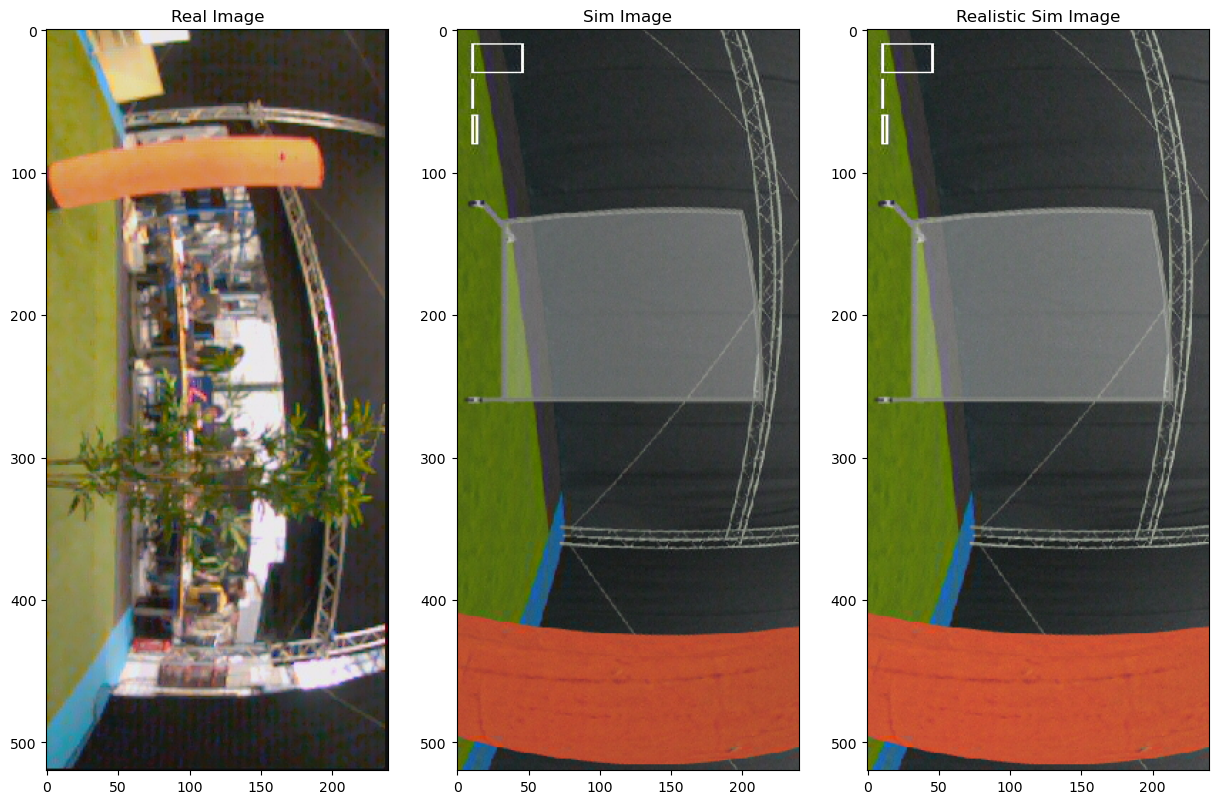

In [2]:
real_images_folder = 'images/real'
sim_images_folder = 'images/sim'

plot_images(real_images_folder, sim_images_folder)

Let's also show an example show some depth maps.

### Create labels
As mentioned before, the images are classified based on the average depth per image region. The `generate_labels` splits the image by default into 3 regions. You can change this number by specifying `n_regions` if you want to try a different labeling approach. You can also change the `top_bottom_crop`, which specifies how much to crop of the top and bottom of the image before labeling. This option is added, since these regions often contain irrelevant information. When labeling, for every image also the mirrored image is saved and labeled, thus increasing the size of your dataset by two!

In [4]:
# Folder where the entire dataset is stored
all_images_folder = os.path.join('images', 'all')

# Create dataframe to store the images with their labels
labeled_images = pd.DataFrame(columns=['file_name', 'left', 'forward', 'right'])

# Label both the real and simulator images
labeled_images = generate_labels(real_images_folder, all_images_folder, labeled_images, top_bottom_crop=0.1)
labeled_images = generate_labels(sim_images_folder, all_images_folder, labeled_images, top_bottom_crop=0.1, realistic=True)

# Save the dataframe
labeled_images.to_csv(os.path.join(all_images_folder, 'image_labels.csv'), index=False)

Generating labels for images in images/real...


100%|██████████| 10/10 [00:00<00:00, 115.84it/s]


Generating labels for images in images/sim...


100%|██████████| 10/10 [00:00<00:00, 122.32it/s]


Now we have all the ingredients we need to train our CNN, time to hop over to the next notebook.